In [1]:
# Import libraries
import os
import re
import pandas as pd
import numpy as np
import seaborn as sms
from datetime import datetime, date, time
from natsort import natsorted
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# Read in usable subs
file=open("newsubs.txt","r")
subs=file.read()
#print(subs)
file.close()

In [36]:
# Read in usable subs
df=pd.DataFrame(data=open("newsubs.txt","r"),columns=['subs'])
df["socialRT"]=np.nan
df["monetaryRT"]=np.nan
for i in range(len(df)):
    df.loc[i,"subs"]=df.loc[i,"subs"].rstrip("\n")
    
    social_df=pd.read_csv('../../istart/social_reward_c/data/'+df.loc[i,"subs"]+'/sub-'+df.loc[i,"subs"]+'_task-socialdoors_run-1_events.tsv', sep="\t")
    df.loc[i,"socialRT"]=np.nanmean(social_df["rt"])
    
    doors_df=pd.read_csv('../../istart/social_reward_c/data/'+df.loc[i,"subs"]+'/sub-'+df.loc[i,"subs"]+'_task-doors_run-1_events.tsv', sep="\t")
    df.loc[i,"monetaryRT"]=np.nanmean(doors_df["rt"])
df.head()
df.to_csv('RTs.csv',index=False)

In [9]:
# Separate deceived and non-deceived subs
nondeceived=["1012","1019","1247","1251","1303","3116","3143","3176"]

nondec_df=df[df["subs"].isin(nondeceived)]
dec_df=df[~df["subs"].isin(nondeceived)]

display(nondec_df.head())
#dec_df.head()

,subs,socialRT,monetaryRT
6,1012,1.637644,1.998317
10,1019,1.509710,1.197850
16,1247,1.857172,1.693141
19,1251,1.805064,1.782938
26,1303,1.918329,1.895477


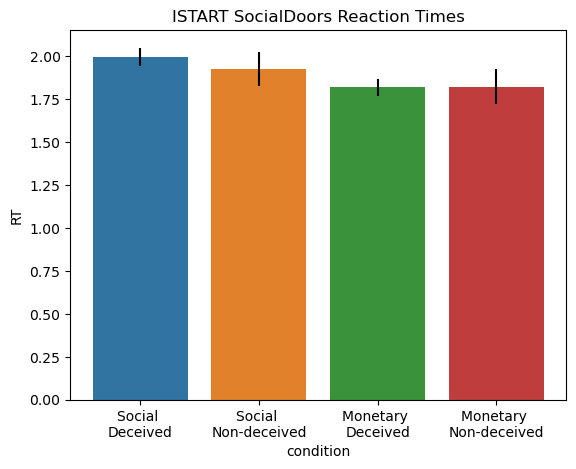

In [35]:
# Organize data
bar_df=pd.DataFrame(columns=['condition','RT','error'])
bar_df.loc[0,'condition']="Social \nDeceived"
bar_df.loc[1,'condition']="Social \nNon-deceived"
bar_df.loc[2,'condition']="Monetary \nDeceived"
bar_df.loc[3,'condition']="Monetary \nNon-deceived"
bar_df.loc[0,'RT']=np.nanmean(dec_df["socialRT"])
bar_df.loc[1,'RT']=np.nanmean(nondec_df["socialRT"])
bar_df.loc[2,'RT']=np.nanmean(dec_df["monetaryRT"])
bar_df.loc[3,'RT']=np.nanmean(nondec_df["monetaryRT"])
bar_df.loc[0,'error']=np.std(dec_df["socialRT"])/np.sqrt(len(dec_df["socialRT"]))
bar_df.loc[1,'error']=np.std(nondec_df["socialRT"])/np.sqrt(len(nondec_df["socialRT"]))
bar_df.loc[2,'error']=np.std(dec_df["monetaryRT"])/np.sqrt(len(dec_df["monetaryRT"]))
bar_df.loc[3,'error']=np.std(nondec_df["monetaryRT"])/np.sqrt(len(nondec_df["monetaryRT"]))

#bar_df.head()

# suppress warning output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# plot RTs
plt.figure()
g=sms.barplot(x='condition',y='RT',data=bar_df)
x_coords = [p.get_x() + 0.5*p.get_width() for p in g.patches]
y_coords = [p.get_height() for p in g.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=bar_df['error'],fmt='none',c='k')
g.set_title("ISTART SocialDoors Reaction Times")
plt.show()

In [44]:
# Run 2x2 ANOVA
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

anova_df=pd.read_excel("RTs_anova.xlsx")
model = ols('RT ~ C(task) + C(deception) + C(task):C(deception)', data=anova_df).fit()
result=sm.stats.anova_lm(model,type=2)
print(result)

                        df    sum_sq   mean_sq         F    PR(>F)
C(task)                1.0  0.603756  0.603756  6.414899  0.013176
C(deception)           1.0  0.014571  0.014571  0.154817  0.694971
C(task):C(deception)   1.0  0.019560  0.019560  0.207828  0.649652
Residual              84.0  7.905891  0.094118       NaN       NaN
